In [12]:
from ema_workbench.em_framework.optimization import (
    ArchiveLogger, 
    EpsilonProgress, 
    to_problem,
    epsilon_nondominated
)

from ema_workbench import (
    HypervolumeMetric,
    GenerationalDistanceMetric,
    EpsilonIndicatorMetric,
    InvertedGenerationalDistanceMetric,
    SpacingMetric,
    Model,
    Scenario,
    CategoricalParameter,
    ArrayOutcome,
    ScalarOutcome,
    IntegerParameter,
    RealParameter,
)

from dike_model_function import DikeNetwork  # @UnresolvedImport
from ema_workbench.util import ema_logging

import pandas as pd
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [92]:
results = pd.read_csv("./output/20230614T1118_results_seed_ds.csv")

### Obtaining hard-coded model parameters from optimize.py. Replace later by "from x import y" formulation

In [14]:
def sum_over(*args):
    numbers = []
    for entry in args:
        try:
            value = sum(entry)
        except TypeError:
            value = entry
        numbers.append(value)

    return sum(numbers)

In [15]:
ema_logging.log_to_stderr(ema_logging.INFO)

# model, steps = get_model_for_problem_formulation(7)

# Load the model:
function = DikeNetwork()
model = Model("dikesnet", function=function)

model.uncertainties = [
    RealParameter("A.1_Bmax", 30, 350),
    RealParameter("A.1_pfail", 0, 1),
    CategoricalParameter("A.1_Brate", [1.0, 1.5, 10]),
    RealParameter("A.2_Bmax", 30, 350),
    RealParameter("A.2_pfail", 0, 1),
    CategoricalParameter("A.2_Brate", [1.0, 1.5, 10]),
    RealParameter("A.3_Bmax", 30, 350),
    RealParameter("A.3_pfail", 0, 1),
    CategoricalParameter("A.3_Brate", [1.0, 1.5, 10]),
    RealParameter("A.4_Bmax", 30, 350),
    RealParameter("A.4_pfail", 0, 1),
    CategoricalParameter("A.4_Brate", [1.0, 1.5, 10]),
    RealParameter("A.5_Bmax", 30, 350),
    RealParameter("A.5_pfail", 0, 1),
    CategoricalParameter("A.5_Brate", [1.0, 1.5, 10]),
    CategoricalParameter("discount rate 0", (1.5, 2.5, 3.5, 4.5)),
    CategoricalParameter("discount rate 1", (1.5, 2.5, 3.5, 4.5)),
    CategoricalParameter("discount rate 2", (1.5, 2.5, 3.5, 4.5)),
    IntegerParameter("A.0_ID flood wave shape", 0, 132),
]

model.levers = [
    IntegerParameter("EWS_DaysToThreat", 0, 4),
    IntegerParameter("rfr_0_t0", 0, 1, variable_name="0_RfR 0"),
    IntegerParameter("rfr_0_t1", 0, 1, variable_name="0_RfR 1"),
    IntegerParameter("rfr_0_t2", 0, 1, variable_name="0_RfR 2"),
    IntegerParameter("rfr_1_t0", 0, 1, variable_name="1_RfR 0"),
    IntegerParameter("rfr_1_t1", 0, 1, variable_name="1_RfR 1"),
    IntegerParameter("rfr_1_t2", 0, 1, variable_name="1_RfR 2"),
    IntegerParameter("rfr_2_t0", 0, 1, variable_name="2_RfR 0"),
    IntegerParameter("rfr_2_t1", 0, 1, variable_name="2_RfR 1"),
    IntegerParameter("rfr_2_t2", 0, 1, variable_name="2_RfR 2"),
    IntegerParameter("rfr_3_t0", 0, 1, variable_name="3_RfR 0"),
    IntegerParameter("rfr_3_t1", 0, 1, variable_name="3_RfR 1"),
    IntegerParameter("rfr_3_t2", 0, 1, variable_name="3_RfR 2"),
    IntegerParameter("rfr_4_t0", 0, 1, variable_name="4_RfR 0"),
    IntegerParameter("rfr_4_t1", 0, 1, variable_name="4_RfR 1"),
    IntegerParameter("rfr_4_t2", 0, 1, variable_name="4_RfR 2"),
    IntegerParameter(
        "A1_DikeIncrease_t0", 0, 10, variable_name="A.1_DikeIncrease 0"
    ),
    IntegerParameter(
        "A1_DikeIncrease_t1", 0, 10, variable_name="A.1_DikeIncrease 1"
    ),
    IntegerParameter(
        "A1_DikeIncrease_t2", 0, 10, variable_name="A.1_DikeIncrease 2"
    ),
    IntegerParameter(
        "A2_DikeIncrease_t0", 0, 10, variable_name="A.2_DikeIncrease 0"
    ),
    IntegerParameter(
        "A2_DikeIncrease_t1", 0, 10, variable_name="A.2_DikeIncrease 1"
    ),
    IntegerParameter(
        "A2_DikeIncrease_t2", 0, 10, variable_name="A.2_DikeIncrease 2"
    ),
    IntegerParameter(
        "A3_DikeIncrease_t0", 0, 10, variable_name="A.3_DikeIncrease 0"
    ),
    IntegerParameter(
        "A3_DikeIncrease_t1", 0, 10, variable_name="A.3_DikeIncrease 1"
    ),
    IntegerParameter(
        "A3_DikeIncrease_t2", 0, 10, variable_name="A.3_DikeIncrease 2"
    ),
    IntegerParameter(
        "A4_DikeIncrease_t0", 0, 10, variable_name="A.4_DikeIncrease 0"
    ),
    IntegerParameter(
        "A4_DikeIncrease_t1", 0, 10, variable_name="A.4_DikeIncrease 1"
    ),
    IntegerParameter(
        "A4_DikeIncrease_t2", 0, 10, variable_name="A.4_DikeIncrease 2"
    ),
    IntegerParameter(
        "A5_DikeIncrease_t0", 0, 10, variable_name="A.5_DikeIncrease 0"
    ),
    IntegerParameter(
        "A5_DikeIncrease_t1", 0, 10, variable_name="A.5_DikeIncrease 1"
    ),
    IntegerParameter(
        "A5_DikeIncrease_t2", 0, 10, variable_name="A.5_DikeIncrease 2"
    ),
]

direction = ScalarOutcome.MINIMIZE
outcomes = []

# Disaggregated Deaths and Damages
for dike in function.dikelist:
    for entry in [
        "Expected_Annual_Damage",
        "Expected_Number_of_Deaths",
    ]:
        if dike == "A.4":
            outcomes.append(
                ScalarOutcome(
                    f"A_4_{entry}",
                    variable_name=f"A_4_{entry}",
                    function=sum_over,
                    kind=direction,
                )
            )

# Aggregated Costs
cost_variables = []
cost_variables.extend(
    [f"{dike}_Dike Investment Costs" for dike in function.dikelist]
)
cost_variables.extend([f"RfR Total Costs"])

outcomes.append(
    ScalarOutcome(
        "Total_Infrastructure_Costs",
        variable_name=[var for var in cost_variables],
        function=sum_over,
        kind=direction,
    )
)

# Aggregated Deaths and Damages
total_damage_variables = []
total_damage_variables.extend(
    [f"{dike}_Expected_Annual_Damage" for dike in function.dikelist]
)

total_casualty_variables = []
total_casualty_variables.extend(
    [f"{dike}_Expected_Number_of_Deaths" for dike in function.dikelist]
)

outcomes.append(
    ScalarOutcome(
        "Total_Expected_Annual_Damage",
        variable_name=[var for var in total_damage_variables],
        function=sum_over,
        kind=direction,
    )
)
outcomes.append(
    ScalarOutcome(
        "Total_Expected_Number_of_Deaths",
        variable_name=[var for var in total_casualty_variables],
        function=sum_over,
        kind=direction,
    )
)

model.outcomes = outcomes
problem = to_problem(model, searchover="levers")

### Convergence plotting

In [88]:
all_archives = []

for i in range(5):
    archives = ArchiveLogger.load_archives(f"./archives/20230614T1118_{i}.tar.gz")
    all_archives.append(archives)

In [89]:
map = {
     '0_RfR 0' : 'rfr_0_t0',
     '0_RfR 1' : 'rfr_0_t1',
     '0_RfR 2' : 'rfr_0_t2',
     '1_RfR 0' : 'rfr_1_t0',
     '1_RfR 1' : 'rfr_1_t1',
     '1_RfR 2' : 'rfr_1_t2',
     '2_RfR 0' : 'rfr_2_t0',
     '2_RfR 1' : 'rfr_2_t1',
     '2_RfR 2' : 'rfr_2_t2',
     '3_RfR 0' : 'rfr_3_t0',
     '3_RfR 1' : 'rfr_3_t1',
     '3_RfR 2' : 'rfr_3_t2',
     '4_RfR 0' : 'rfr_4_t0',
     '4_RfR 1' : 'rfr_4_t1',
     '4_RfR 2' : 'rfr_4_t2',
     'EWS_DaysToThreat' : 'EWS_DaysToThreat',
     'A.1_DikeIncrease 0' : 'A1_DikeIncrease_t0',
     'A.1_DikeIncrease 1' : 'A1_DikeIncrease_t1',
     'A.1_DikeIncrease 2' : 'A1_DikeIncrease_t2',
     'A.2_DikeIncrease 0' : 'A2_DikeIncrease_t0',
     'A.2_DikeIncrease 1' : 'A2_DikeIncrease_t1',
     'A.2_DikeIncrease 2' : 'A2_DikeIncrease_t2',
     'A.3_DikeIncrease 0' : 'A3_DikeIncrease_t0',
     'A.3_DikeIncrease 1' : 'A3_DikeIncrease_t1',
     'A.3_DikeIncrease 2' : 'A3_DikeIncrease_t2',
     'A.4_DikeIncrease 0' : 'A4_DikeIncrease_t0',
     'A.4_DikeIncrease 1' : 'A4_DikeIncrease_t1',
     'A.4_DikeIncrease 2' : 'A4_DikeIncrease_t2',
     'A.5_DikeIncrease 0' : 'A5_DikeIncrease_t0',
     'A.5_DikeIncrease 1' : 'A5_DikeIncrease_t1',
     'A.5_DikeIncrease 2' : 'A5_DikeIncrease_t2',
     'A.4 Expected Annual Damage' : 'A_4_Expected_Annual_Damage',
     'A.4 Expected Number of Deaths' : 'A_4_Expected_Number_of_Deaths',
     'Total Infrastructure Costs' : 'Total_Infrastructure_Costs',
     'Total Expected Annual Damage' : 'Total_Expected_Annual_Damage',
     'Total Expected Number of Deaths' : 'Total_Expected_Number_of_Deaths'
}
for i in range(len(all_archives)):
    archive = all_archives[i]
    for key, df in archive.items():
        archive[key] = df.rename(map, axis=1)
        if 'Unnamed: 0' in df.columns:
            archive[key] = archive[key].drop('Unnamed: 0', axis=1)
    all_archives[i] = archive
    # print(type(archive))
    # print(archive.keys())
    # print('--')
    # df = all_archives[i]
    # all_archives[i] = df[0].rename(map)

print(all_archives[2].keys())
all_archives[4][100]

dict_keys([0, 100, 10721, 11764, 1196, 12778, 13815, 14842, 15888, 16942, 17977, 19030, 20032, 21100, 22160, 2294, 23235, 24305, 25386, 26463, 27517, 28580, 29631, 30692, 31737, 32795, 33863, 3390, 34918, 35955, 37001, 38064, 39125, 40046, 4483, 5564, 6601, 7618, 8663, 9697])


,rfr_0_t0,rfr_0_t1,rfr_0_t2,rfr_1_t0,rfr_1_t1,rfr_1_t2,rfr_2_t0,rfr_2_t1,rfr_2_t2,rfr_3_t0,...,A4_DikeIncrease_t1,A4_DikeIncrease_t2,A5_DikeIncrease_t0,A5_DikeIncrease_t1,A5_DikeIncrease_t2,A_4_Expected_Annual_Damage,A_4_Expected_Number_of_Deaths,Total_Infrastructure_Costs,Total_Expected_Annual_Damage,Total_Expected_Number_of_Deaths
0,0,1,0,0,0,1,0,0,0,0,...,8,0,9,8,4,0.0,0.0,8.778024e+08,4.233433e+06,0.009535
1,0,1,0,0,0,1,1,0,1,0,...,6,9,4,0,4,0.0,0.0,1.130124e+09,0.000000e+00,0.000000


In [90]:
# results = results.drop('Unnamed: 0', axis=1)

In [105]:
results = results.rename(map, axis=1)
results = results.rename({'Unnamed: 0' : 'Policy ID'}, axis=1)
results_list = [df.reset_index(drop=True) for _, df in results.groupby(results['Policy ID'].eq(0).cumsum())]
results_list[0].head()

,Policy ID,rfr_0_t0,rfr_0_t1,rfr_0_t2,rfr_1_t0,rfr_1_t1,rfr_1_t2,rfr_2_t0,rfr_2_t1,rfr_2_t2,...,A4_DikeIncrease_t1,A4_DikeIncrease_t2,A5_DikeIncrease_t0,A5_DikeIncrease_t1,A5_DikeIncrease_t2,A_4_Expected_Annual_Damage,A_4_Expected_Number_of_Deaths,Total_Infrastructure_Costs,Total_Expected_Annual_Damage,Total_Expected_Number_of_Deaths
0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0.000000e+00,0.000000,1.503062e+08,3.352976e+06,0.000487
1,1,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0.000000e+00,0.000000,1.425086e+08,1.595323e+07,0.002268
2,2,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1.460654e+07,0.001105,1.390795e+08,1.999202e+07,0.001867
3,3,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0.000000e+00,0.000000,1.481009e+08,9.703126e+06,0.002203
4,4,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,4.148824e+06,0.000343,1.469795e+08,1.385195e+07,0.002546


In [106]:
for i, df in enumerate(results_list):
    results_list[i] = df.drop('Policy ID', axis=1)
    print(results_list[i].shape)

(47, 36)
(47, 36)
(42, 36)
(43, 36)
(47, 36)


results

In [108]:
espilon = [100, 0.01, 100, 100, 0.01]
reference_set = epsilon_nondominated(results_list, espilon, problem)

In [134]:
len(reference_set)

47

In [109]:
hv = HypervolumeMetric(reference_set, problem)
gd = GenerationalDistanceMetric(reference_set, problem, d=1)
ei = EpsilonIndicatorMetric(reference_set, problem)
ig = InvertedGenerationalDistanceMetric(reference_set, problem, d=1)
sm = SpacingMetric(problem)

metrics_by_seed = []

for archives in all_archives:
    metrics = []
    for nfe, archive in archives.items():
        scores = {
            "generational_distance": gd.calculate(archive),
            "hypervolume": hv.calculate(archive),
            "epsilon_indicator": ei.calculate(archive),
            "inverted_gd": ig.calculate(archive),
            "spacing": sm.calculate(archive),
            "nfe": int(nfe),
        }
        metrics.append(scores)
    metrics = pd.DataFrame.from_dict(metrics)

    # sort metrics by number of function evaluations
    metrics.sort_values(by="nfe", inplace=True)
    metrics_by_seed.append(metrics)

In [127]:
convergences = pd.read_csv('./output/20230614T1118_convergence_seed_ds.csv')

In [128]:
convergences_list = [df.reset_index(drop=True) for _, df in convergences.groupby(convergences['Unnamed: 0'].eq(0).cumsum())]
convergences_list[0].head()

,Unnamed: 0,epsilon_progress,nfe
0,0,0,0
1,1,9,100
2,2,46,1198
3,3,90,2292
4,4,140,3391


In [130]:
for i, df in enumerate(convergences_list):
    convergences_list[i] = df.drop('Unnamed: 0', axis=1)
    print(convergences_list[i].shape)

(40, 2)
(39, 2)
(40, 2)
(40, 2)
(40, 2)


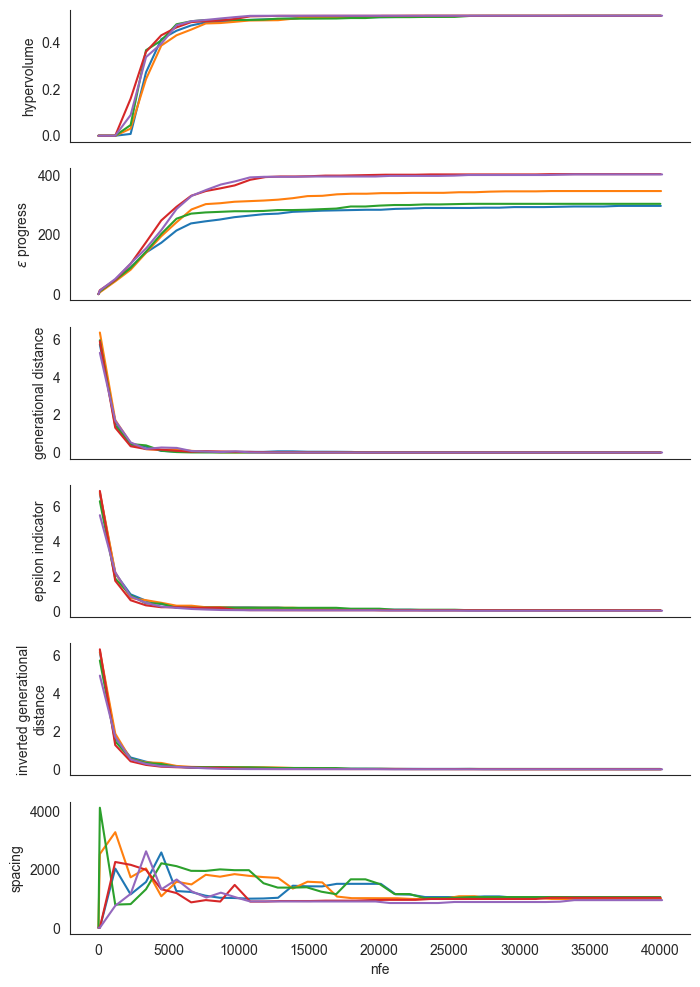

In [133]:
sns.set_style("white")
fig, axes = plt.subplots(nrows=6, figsize=(8, 12), sharex=True)

ax1, ax2, ax3, ax4, ax5, ax6 = axes

for metrics, convergence in zip(metrics_by_seed, convergences_list):
    # print(metrics)

    # print('----------------------------')

    # print(convergence)
    ax1.plot(metrics.nfe, metrics.hypervolume)
    ax1.set_ylabel("hypervolume")

    ax2.plot(convergence.nfe, convergence.epsilon_progress)
    ax2.set_ylabel("$\epsilon$ progress")

    ax3.plot(metrics.nfe, metrics.generational_distance)
    ax3.set_ylabel("generational distance")

    ax4.plot(metrics.nfe, metrics.epsilon_indicator)
    ax4.set_ylabel("epsilon indicator")

    ax5.plot(metrics.nfe, metrics.inverted_gd)
    ax5.set_ylabel("inverted generational\ndistance")

    ax6.plot(metrics.nfe, metrics.spacing)
    ax6.set_ylabel("spacing")

ax6.set_xlabel("nfe")


sns.despine(fig)

plt.show()

### CELLS BELOW ARE TERMPORARY TO PLOT EPSILON CONVERGENCE

In [95]:
epsilon_set = pd.read_csv("./output/20230614T1118_convergence_seed_ds.csv")
epsilon_set.columns = ['step', 'epsilon_progress', 'nfe']
df = epsilon_set
df

,step,epsilon_progress,nfe
0,0,0,0
1,1,9,100
2,2,46,1198
3,3,90,2292
4,4,140,3391
...,...,...,...
194,35,403,36935
195,36,403,37946
196,37,403,38964
197,38,403,39998


In [31]:
dfs = [df.reset_index(drop=True) for _, df in df.groupby(df['step'].eq(0).cumsum())]

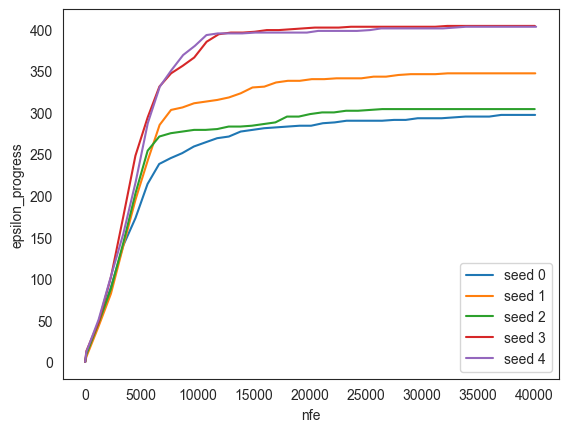

In [32]:
for idx, df in enumerate(dfs):
#    f, ax = plt.subplots(1, figsize=(8, 12))
    sns.lineplot(x=df['nfe'], y=df['epsilon_progress'],label='seed '+str(idx))